In [1]:
import torch
print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

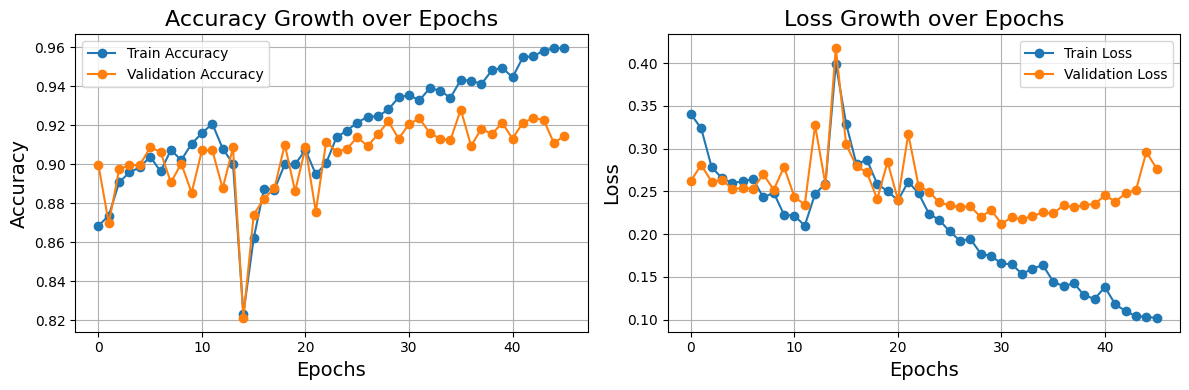

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'training_history_bi_fold_4.csv'
data = pd.read_csv(file_path)

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot Accuracy Growth
axs[0].plot(data['accuracy'], label='Train Accuracy', marker='o', linestyle='-')
axs[0].plot(data['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-')
axs[0].set_title('Accuracy Growth over Epochs', fontsize=16)  # Perbesar judul
axs[0].set_xlabel('Epochs', fontsize=14)  # Perbesar label sumbu X
axs[0].set_ylabel('Accuracy', fontsize=14)  # Perbesar label sumbu Y
axs[0].legend()
axs[0].grid(True)

# Plot Loss Growth
axs[1].plot(data['loss'], label='Train Loss', marker='o', linestyle='-')
axs[1].plot(data['val_loss'], label='Validation Loss', marker='o', linestyle='-')
axs[1].set_title('Loss Growth over Epochs', fontsize=16)  # Perbesar judul
axs[1].set_xlabel('Epochs', fontsize=14)  # Perbesar label sumbu X
axs[1].set_ylabel('Loss', fontsize=14)  # Perbesar label sumbu Y
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


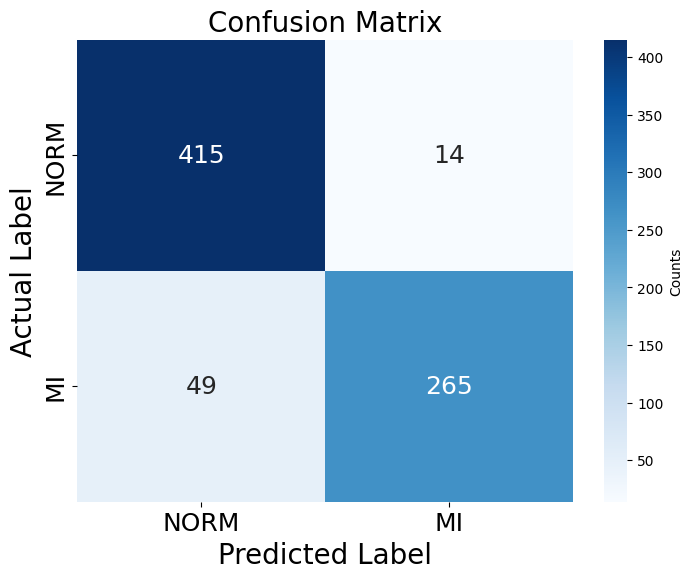

In [9]:
import seaborn as sns
import numpy as np
# Load the confusion matrix data
confusion_matrix_file_path = 'confusion_matrix_stacked_fold_4.csv'
confusion_matrix_data = pd.read_csv(confusion_matrix_file_path, header=None)



# Extract the numerical confusion matrix from the data
conf_matrix = confusion_matrix_data.iloc[1:, 1:].values.astype(int)
labels = ['NORM', 'MI']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,
            cbar_kws={'label': 'Counts'}, annot_kws={"size": 18})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('Actual Label', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


In [ ]:
import os
import ast
import wfdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras

sns.set_style('darkgrid')
PATH_TO_DATA = 'ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'

ECG_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'ptbxl_database.csv'), index_col='ecg_id')
ECG_df.scp_codes = ECG_df.scp_codes.apply(lambda x: ast.literal_eval(x))
ECG_df.patient_id = ECG_df.patient_id.astype(int)
ECG_df.nurse = ECG_df.nurse.astype('Int64')
ECG_df.site = ECG_df.site.astype('Int64')
ECG_df.validated_by = ECG_df.validated_by.astype('Int64')

SCP_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'scp_statements.csv'), index_col=0)
SCP_df = SCP_df[SCP_df.diagnostic == 1]

half_rows = len(ECG_df) // 2
ECG_df = ECG_df.iloc[half_rows:]
ECG_df
def diagnostic_class(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_class)
    return list(res)
                    
ECG_df['scp_classes'] = ECG_df.scp_codes.apply(diagnostic_class)
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

sampling_rate = 100

ECG_data = load_raw_data(ECG_df, sampling_rate, PATH_TO_DATA)

ECG_data.shape


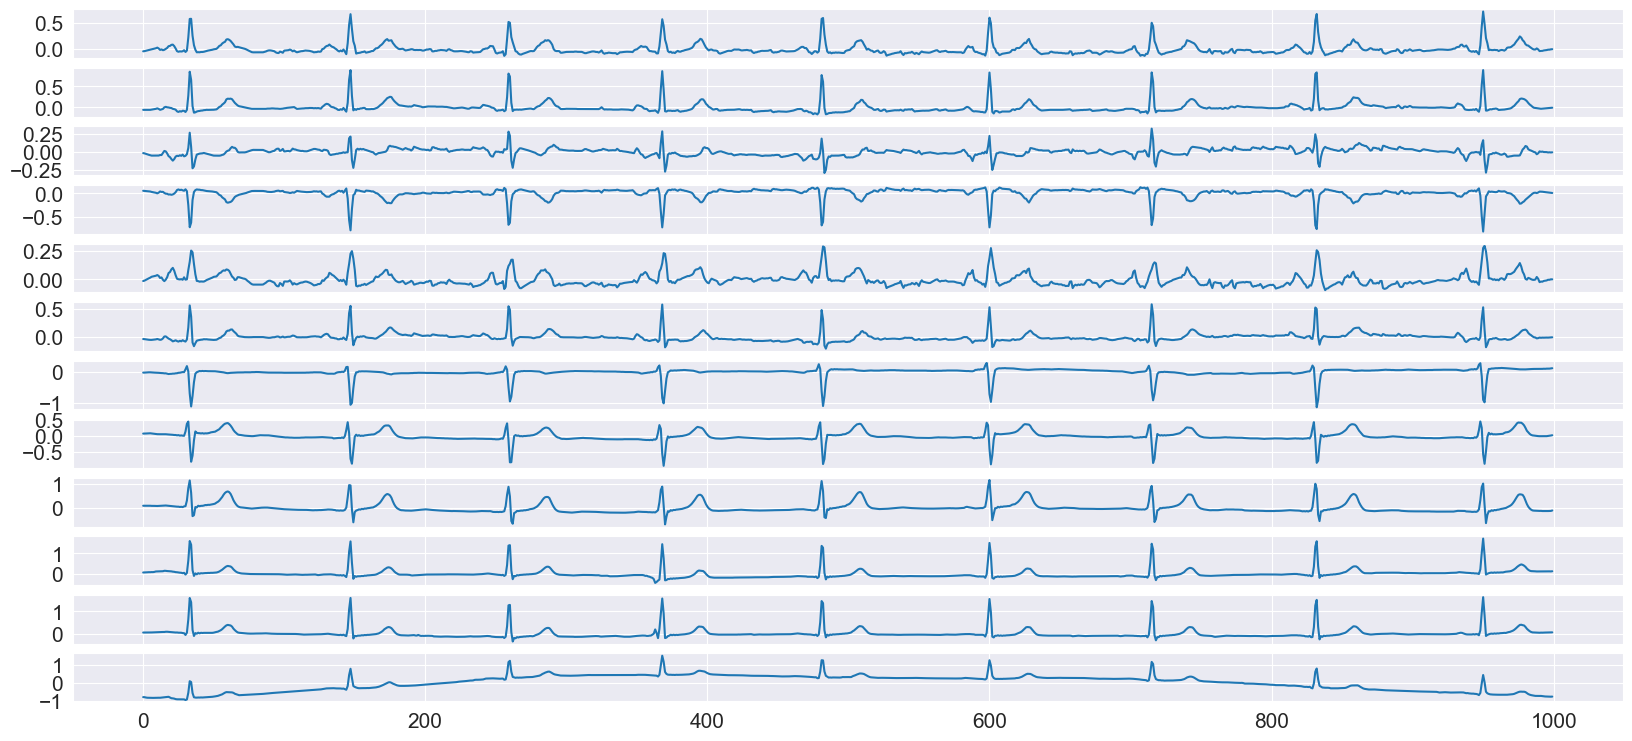

In [23]:
sample = ECG_data[138]  # Pastikan ECG_data sudah ada dalam lingkungan Anda
bar, axes = plt.subplots(sample.shape[1], 1, figsize=(7, 9))

for i in range(sample.shape[1]):
    sns.lineplot(x=np.arange(sample.shape[0]), y=sample[:, i], ax=axes[i])

# Perbesar angka pada sumbu X dan Y
for ax in axes:
    ax.tick_params(axis='both', labelsize=15)  # Mengatur ukuran font untuk sumbu X dan Y

plt.show()

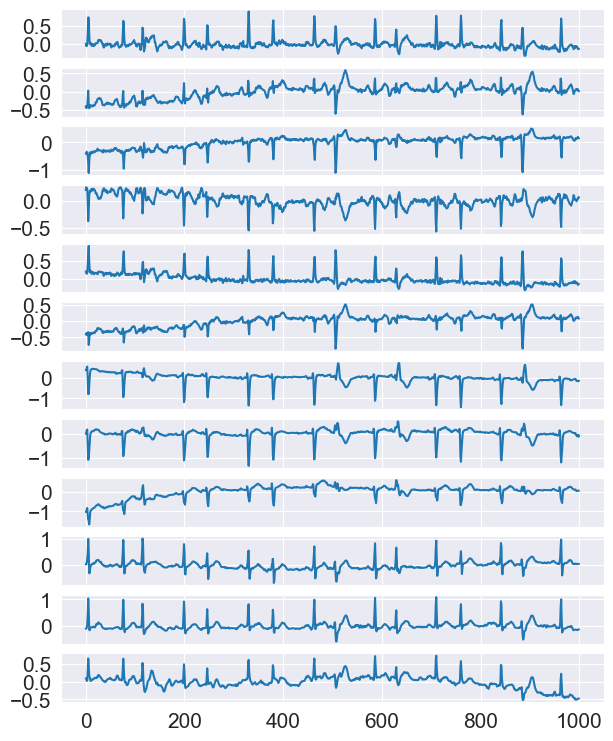

In [22]:
sample = ECG_data[0]  # Pastikan ECG_data sudah ada dalam lingkungan Anda
bar, axes = plt.subplots(sample.shape[1], 1, figsize=(7, 9))

for i in range(sample.shape[1]):
    sns.lineplot(x=np.arange(sample.shape[0]), y=sample[:, i], ax=axes[i])

# Perbesar angka pada sumbu X dan Y
for ax in axes:
    ax.tick_params(axis='both', labelsize=15)  # Mengatur ukuran font untuk sumbu X dan Y

plt.show()

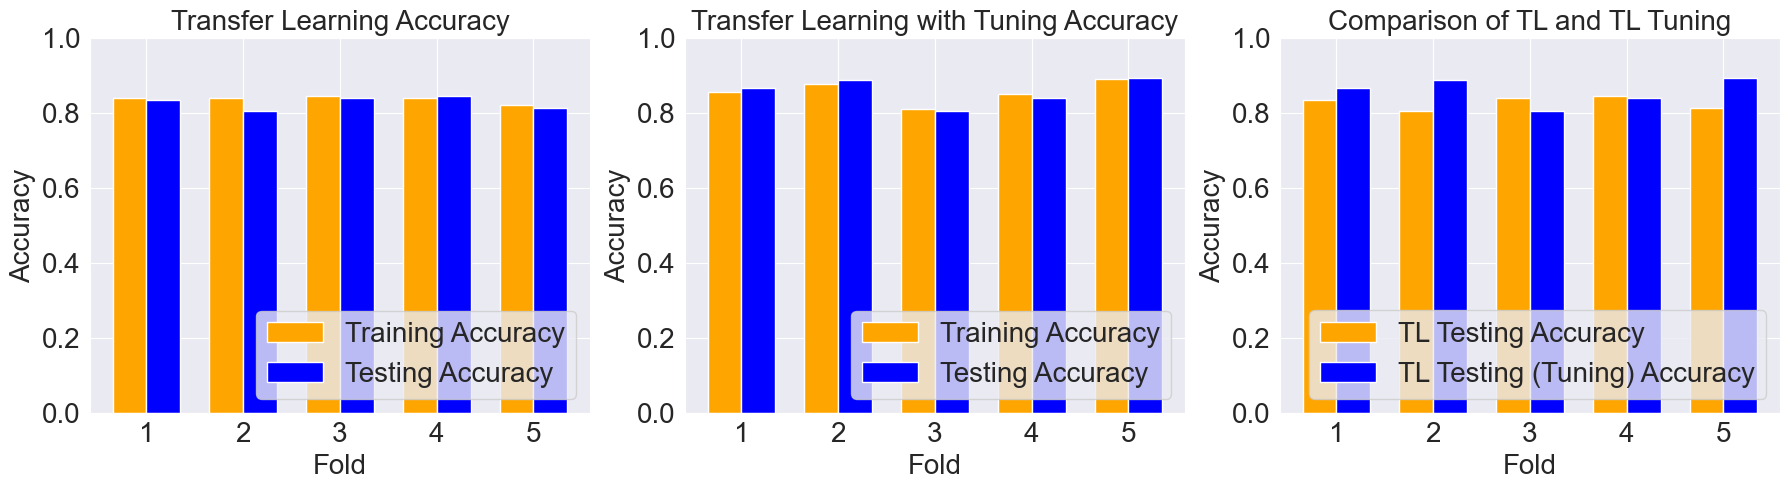

In [32]:
import pandas as pd

# Data for the plots
data_a = {
    "Fold": [1, 2, 3, 4, 5],
    "Train Accuracy": [0.8406, 0.8421, 0.8450, 0.8421, 0.8233],
    "Test Accuracy": [0.8344, 0.8075, 0.8398, 0.8465, 0.8142]
}

data_b = {
    "Fold": [1, 2, 3, 4, 5],
    "Train Accuracy": [0.8563, 0.8780, 0.8128, 0.8525, 0.8907],
    "Test Accuracy": [0.8681, 0.8882, 0.8075, 0.8398, 0.8936]
}

data_c = {
    "Fold": [1, 2, 3, 4, 5],
    "Test Accuracy TL": [0.8344, 0.8075, 0.8398, 0.8465, 0.8142],
    "Test Accuracy TL Tuning": [0.8681, 0.8882, 0.8075, 0.8398, 0.8936]
}

# Creating DataFrames
df_a = pd.DataFrame(data_a)
df_b = pd.DataFrame(data_b)
df_c = pd.DataFrame(data_c)

# Saving to CSV
csv_path_a = "data/transfer_learning_accuracy.csv"
csv_path_b = "data/transfer_learning_tuning_accuracy.csv"
csv_path_c = "data/comparison_tl_tuning_accuracy.csv"

df_a.to_csv(csv_path_a, index=False)
df_b.to_csv(csv_path_b, index=False)
df_c.to_csv(csv_path_c, index=False)

(csv_path_a, csv_path_b, csv_path_c)
import matplotlib.pyplot as plt
import numpy as np

# Function to plot bar charts
def plot_bar_chart_with_custom_colors(ax, x, train, test, title, labels, fontsize):
    width = 0.35  # width of bars
    ax.bar(x - width/2, train, width, label=labels[0], color='orange')
    ax.bar(x + width/2, test, width, label=labels[1], color='blue')
    ax.set_xlabel('Fold', fontsize=fontsize)
    ax.set_ylabel('Accuracy', fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(x, fontsize=fontsize)
    ax.set_ylim(0, 1)  # Setting the y-axis range from 0 to 1
    ax.legend(fontsize=fontsize, loc='lower right')  # Legend positioned at the bottom-right
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
# Data for plotting
folds = np.array([1, 2, 3, 4, 5])

# Subplot (a)
train_a = df_a["Train Accuracy"].values
test_a = df_a["Test Accuracy"].values

# Subplot (b)
train_b = df_b["Train Accuracy"].values
test_b = df_b["Test Accuracy"].values

# Subplot (c)
test_c_tl = df_c["Test Accuracy TL"].values
test_c_tuning = df_c["Test Accuracy TL Tuning"].values

# Plotting
fontsize = 20  # Customize font size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_bar_chart_with_custom_colors(axes[0], folds, train_a, test_a, 'Transfer Learning Accuracy', 
                                  ['Training Accuracy', 'Testing Accuracy'], fontsize)
plot_bar_chart_with_custom_colors(axes[1], folds, train_b, test_b, 'Transfer Learning with Tuning Accuracy', 
                                  ['Training Accuracy', 'Testing Accuracy'], fontsize)
plot_bar_chart_with_custom_colors(axes[2], folds, test_c_tl, test_c_tuning, 
                                  'Comparison of TL and TL Tuning', 
                                  ['TL Testing Accuracy', 'TL Testing (Tuning) Accuracy'], fontsize)

plt.tight_layout()
plt.show()


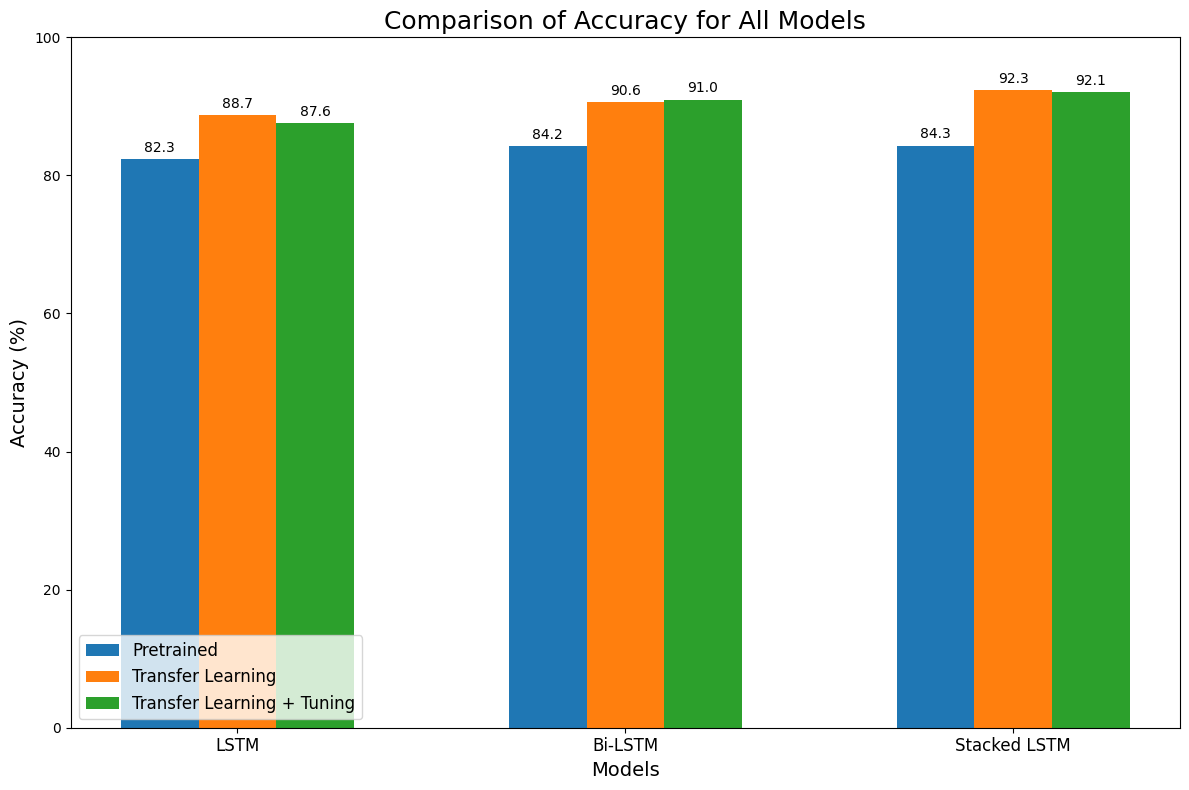

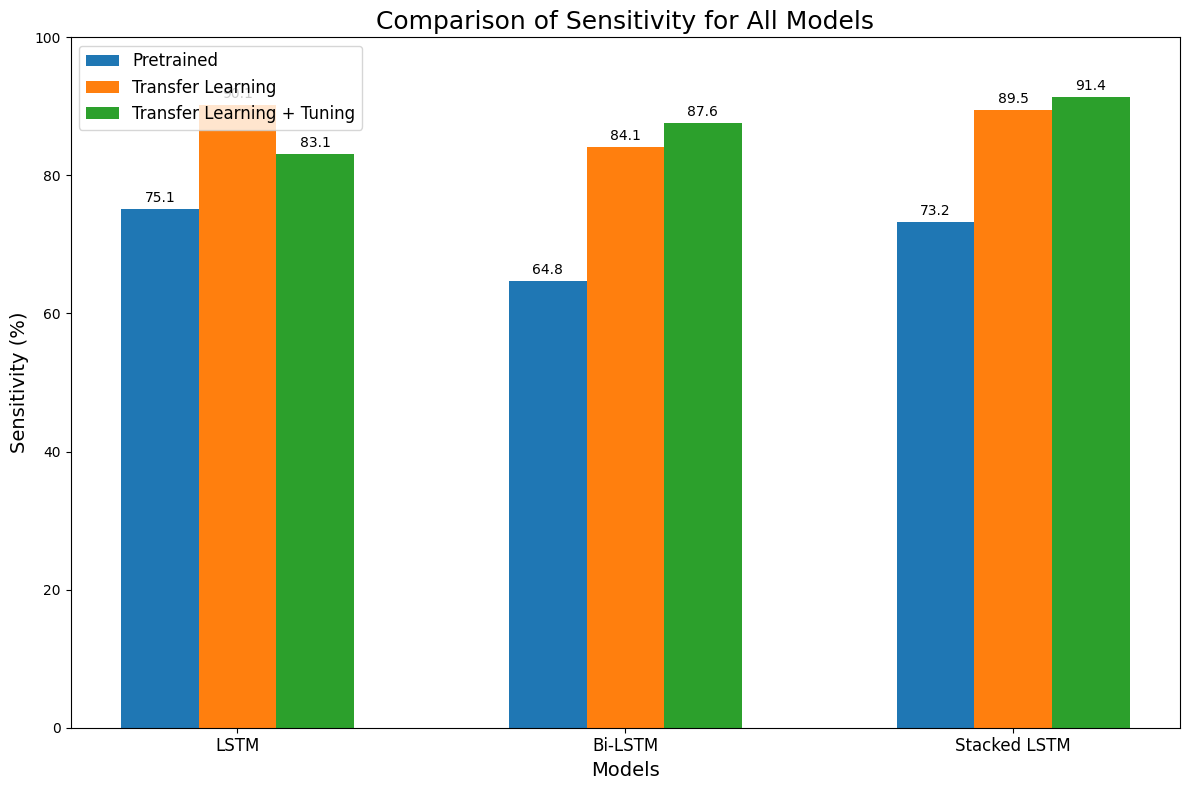

In [3]:
# Importing necessary libraries again after environment reset
import matplotlib.pyplot as plt
import numpy as np

# Data yang sudah disiapkan
accuracy_results = {
    "LSTM": [82.35, 88.69, 87.62],  # Akurasi untuk pretrained, transfer learning, dan tuning
    "Bi-LSTM": [84.19, 90.58, 90.98],
    "Stacked LSTM": [84.32, 92.33, 92.06],
}

sensitivity_results = {
    "LSTM": [75.10, 90.13, 83.12],  # Sensitivitas untuk pretrained, transfer learning, dan tuning
    "Bi-LSTM": [64.75, 84.08, 87.58],
    "Stacked LSTM": [73.18, 89.49, 91.40],
}

# Fungsi untuk membuat bar plot perbandingan untuk semua model dalam satu gambar
def create_combined_bar_plot(metric_name, metric_results, ylabel):
    approaches = ["Pretrained", "Transfer Learning", "Transfer Learning + Tuning"]
    models = list(metric_results.keys())
    num_models = len(models)
    num_approaches = len(approaches)

    x = np.arange(num_models)  # Label posisi untuk model
    width = 0.2  # Lebar bar

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot bar untuk setiap pendekatan
    for i in range(num_approaches):
        values = [metric_results[model][i] for model in models]
        ax.bar(x + (i - 1) * width, values, width, label=approaches[i])

    # Tambahkan teks dan label
    ax.set_title(f"Comparison of {metric_name} for All Models", fontsize=18)
    ax.set_xticks(x)
    ax.set_xticklabels(models, fontsize=12)
    ax.legend(fontsize=12)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xlabel("Models", fontsize=14)
    ax.set_ylim(0, 100)  # Maksimal 100%

    # Tambahkan nilai pada bar
    for i in range(num_approaches):
        values = [metric_results[model][i] for model in models]
        for j, value in enumerate(values):
            ax.annotate(f"{value:.1f}",
                        xy=(x[j] + (i - 1) * width, value),
                        xytext=(0, 3),  # Jarak ke teks
                        textcoords="offset points",
                        ha="center", va="bottom", fontsize=10)

    plt.tight_layout()
    plt.show()

# Plot untuk Akurasi
create_combined_bar_plot("Accuracy", accuracy_results, "Accuracy (%)")

# Plot untuk Sensitivitas
create_combined_bar_plot("Sensitivity", sensitivity_results, "Sensitivity (%)")
